In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/los-angeles-1992-riot-deaths-from-la-times/la-riots-deaths.csv
/kaggle/input/la-map-img/map (3).png


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
riots_data = pd.read_csv("../input/los-angeles-1992-riot-deaths-from-la-times/la-riots-deaths.csv")
riots_data.head()


,first,last,Full Name,Solved*,Age,Gender,Race,Date,Address,Neighborhood,status,lat,lon,Map Description,Story,URL
0,Cesar A.,Aguilar,Cesar A. Aguilar,NaN,18,Male,Latino,1992-04-30,2009 W. 6th St.,Westlake,Officer involved shooting,-118.273976,34.059281,"Cesar Aguilar, an 18-year-old Latino, was shot...","Cesar Aguilar, an 18-year-old Latino, was shot...",http://articles.latimes.com/print/1992-06-21/n...
1,George,Alvarez,George Alvarez,NaN,42,Male,Latino,1992-05-01,Main & College streets,Chinatown,Not riot-related,-118.234098,34.062690,"George Alvarez, a 42-year-old Latino, died Fri...","George Alvarez, a 42-year-old Latino, died Fri...",NaN
2,Wilson,Alvarez,Wilson Alvarez,Unsolved,40,Male,Latino,1992-05-23,3100 Rosecrans Ave.,Hawthorne,Homicide,-118.326816,33.901662,"Wilson Alvarez, a 40-year-old Latino, died of ...","Wilson Alvarez, a 40-year-old Latino, died of ...",NaN
3,Brian E.,Andrew,Brian E. Andrew,NaN,30,Male,Black,1992-04-30,Rosecrans & Chester avenues,Compton,Officer involved shooting,-118.215390,33.903457,"Brian E. Andrew, a 30-year-old black man, was ...","Brian E. Andrew, a 30-year-old black man, was ...",http://articles.latimes.com/print/1992-05-24/n...
4,Vivian,Austin,Vivian Austin,NaN,87,Female,Black,5/3/1992,1600 W. 60th St.,Harvard Park,Death,-118.304741,33.985667,"Vivian Austin, an 87-year-old black woman, die...","Vivian Austin, an 87-year-old black woman, die...",NaN


In [74]:
#dtype of the dataset
type(riots_data)

#list of column names
riots_data.columns 

Index(['first', 'last', 'Full Name', 'Solved*', 'Age', 'Gender', 'Race',
       'Date', 'Address', 'Neighborhood', 'status', 'lat', 'lon',
       'Map Description', 'Story', 'URL'],
      dtype='object')

In [75]:
BBox=((riots_data.lat.min(), riots_data.lat.max(), riots_data.lon.min(), riots_data.lon.max()))
#defines the area of the map that will include all the spatial points 

BBox

(-118.4717452, -117.73064690000001, 33.789857500000004, 34.287098)

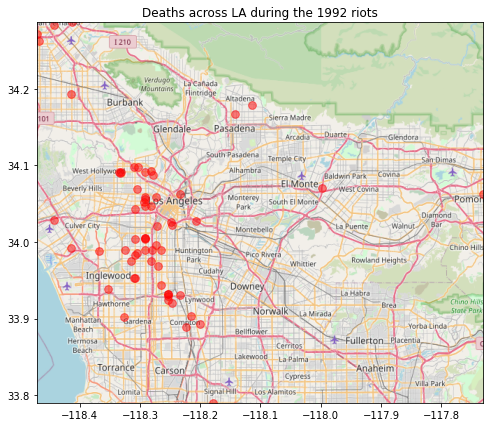

In [76]:
#import map layer extracted based on the lat and long values
la_map = plt.imread('../input/la-map-img/map (3).png')

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(riots_data.lat,riots_data.lon, zorder=2, alpha= 0.5, c='r', s=60)
ax.set_title('Deaths across LA during the 1992 riots')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(la_map, zorder=1, extent=BBox,aspect='auto')